# **Analisis Sentimen Pengguna Aplikasi KAI Accesss**



1.   Import library & data
2.   Cleaning Data
2.   Prep-rocessing Data
3.   Labeling
4.   Visualization
5.   Prepare Data Training
6.   Training Data ( machine learning )
7.   Comparative evaluation



In [1]:
!pip install Sastrawi

##1.   Import library & data

In [ ]:

# 1. Library Data & Umum
import pandas as pd
import numpy as np
import string
import re
import datetime as dt


# 2. Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud


# 3. Text Preprocessing & NLP
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist

from textblob import TextBlob

# Inisialisasi stemmer
stemmer = PorterStemmer()


# 4. Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report
)

# 5. Ekstraksi Data

# from google_play_scraper import Sort, reviews_all, reviews
# import calendar


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Ambil ulasan pengguna aplikasi KAI Access dari situs web Google Play.**

Dalam tahap mengambil ulasan aplikasi KAI Access, saya mendapatkan semua informasi yang akan digunakan untuk analisis, seperti reviewID, username, content, score, date, dll

## 1.1  Data Acquisition (Scrapping Data)

**Data Collection App review Exporter**

langkah pertama yang dilakukan adalah menginstal pustaka google-play-scraper untuk mendapatkan data dari Google Play Store.



In [105]:
pip install google-play-scraper

## 1.2 Mengambil Data
Sumber data diperoleh dari **Google Play Store** pada halaman aplikasi KAI Access dengan URL berikut:


🔗[KAI Access - Google Play Store](https://play.google.com/store/apps/details?id=com.kai.kaiticketing)



Untuk pengambilan data, digunakan metode web scraping dengan mengambil ID aplikasi:
**com.kai.kaiticketing**

Data yang diambil sebanyak :
500 ulasan dalam bahasa Indonesia

In [106]:
from google_play_scraper import Sort, reviews

resultt, continuation_token = reviews(
    'com.kai.kaiticketing',
    lang='id',  # Bahasa Indonesia
    country='id',  # Sumber Data Review Google Play Store Indonesia
    sort=Sort.RATING,  # Rating tertinggi/terendah
    count=690,  # Ambil 500 ulasan
    filter_score_with=5  # Hanya ambil ulasan dengan rating 5
)

# Jika ingin melanjutkan pengambilan data
if continuation_token:
    additional_result, _ = reviews(
        'com.kai.kaiticketing',
        continuation_token=continuation_token
    )
    resultt.extend(additional_result)

# Konversi ke DataFrame
df = pd.DataFrame(resultt)

# # Simpan ke CSV
# df.to_csv('DatasetMentahKAI.csv', index=False, encoding='utf-8')

In [107]:
resultt

[{'reviewId': 'b764d3ec-daf3-4bf9-b577-777c44a7dcf9',
  'userName': 'Kapten Erna',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLSh1ogEe6bAlQXC-YYmnxPDHqK47bL5iGvPBA-OBYkA2F5Lw=mo',
  'content': 'Pemesanan mll KAI Acces kereeen.. Tapi ada yg "mengecewakan" yaitu posisi nomot kursi. Kalo nomor kecil itu ya pasti didepan & nomor besar ya pasti di belakang. Harus ada kepastian posisi nomor kursi di depan atau dibelakang, agar kepuasan pelanggan tetap terjaga. Tolong di perhatikan ya. Mgkn bs pake digital atau nomor yg di pasang/ lepas.',
  'score': 5,
  'thumbsUpCount': 73,
  'reviewCreatedVersion': '6.11.2',
  'at': datetime.datetime(2025, 4, 6, 6, 20, 43),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '6.11.2'},
 {'reviewId': 'a29725ac-962f-4bcf-b798-c16467e247b1',
  'userName': 'Muhammad Daffa Syakhisk',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjV4OA8t8ZDOLWy7AQWWpKR6b6_DgOcJHizpKFRb51EuF_7c1EWFYg',
  'content': '31/Okt/17 Bagaimana 

Download ke format csv

## **1.3 Tahap Membaca dan Membuat Data Frame**

In [108]:
import pandas as pd

# Membaca dataset dan menyimpannya dalam DataFrame dengan nama 'KAI'
KAI = pd.read_csv('/content/DatasetMentahKAI.csv')

# Menampilkan dataframe KAI untuk memastikan data terbaca dengan baik
display(KAI)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,921895ee-4446-4bda-990b-f42efb7f2946,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sebenarnya kurang setuju dgn pemberlakuan...,5,54,1.6.1.2,9/3/2019 8:32,NaN,NaN,1.6.1.2
1,c4e847dd-5e6b-4980-a9e1-c3f86718e30b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Nice App, Cuman Kadang Sering Error. Kalau Apl...",5,0,4.3.3,9/24/2021 6:54,NaN,NaN,4.3.3
2,31c498ea-70cb-4fc7-ae20-8af6225efcbe,Sigit Rahardjo,https://play-lh.googleusercontent.com/a-/ALV-U...,Habis di upgrade malah akun tidak bisa di akse...,5,35,5.0.5,11/5/2022 8:24,Terima kasih telah menggunakan aplikasi KAI Ac...,5/18/2022 3:38,5.0.5
3,48b504ac-9350-4028-b14a-fa1924665ffc,Muhammad Yusabbi,https://play-lh.googleusercontent.com/a-/ALV-U...,dengan access bu Kai semua jadi mudah memesan ...,5,0,6.11.1,3/21/2025 15:49,NaN,NaN,6.11.1
4,25f3ca9c-d93d-40df-97a3-a211ef1df635,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"utk pindah kursi, menngganti nya terlalu lama ...",5,0,1.4.8.1,6/4/2019 4:16,NaN,NaN,1.4.8.1
...,...,...,...,...,...,...,...,...,...,...,...
776,9042dbb8-dadf-4afc-a8b6-023ef5d09651,Rizky,https://play-lh.googleusercontent.com/a-/ALV-U...,ayoo perbanyak bintang satunya 👎,1,0,6.11.2,3/29/2025 17:37,NaN,NaN,6.11.2
777,c96f7322-3194-4e95-97ed-56e1df46bcf5,LAILATUL RUSHAJ,https://play-lh.googleusercontent.com/a-/ALV-U...,gimanaa sihhh jam 00.00 udah ngisi data penump...,1,0,6.11.2,3/29/2025 17:37,NaN,NaN,6.11.2
778,35424003-ce10-4142-baa9-1f80506aa78a,Heri Aryadi,https://play-lh.googleusercontent.com/a/ACg8oc...,masukan aja...tolong dibenahi sistem nya apala...,1,0,6.11.2,3/29/2025 17:37,NaN,NaN,6.11.2
779,2bee4363-a03b-4616-be95-b795e02d086c,Ryan Suryana,https://play-lh.googleusercontent.com/a/ACg8oc...,kebanyakan gangguan loding lamaa,1,0,NaN,3/29/2025 17:36,NaN,NaN,NaN


## **Data Preparation**
### **case folding**

tahap selanjutnya saya dowloand dataset lalu memasukkannya ke dalam drive dengan nama DatasetMentahKAI lalu diubah isi datanya menjadi case folding.

In [ ]:
import pandas as pd

df = pd.read_csv('C:\Users\Erycaa\Downloads\Project Nlp\TransportApp-Sentiment-Analysis-Lexicon-Inset-SVM\Dataset\Data Collection\Data-Mentah\DatasetMentahKAI.csv')
OlahData = df[['content']].copy()
OlahData['case folding'] = OlahData['content'].str.lower()
OlahData.to_csv('OlahData.csv', index=False)
OlahData = pd.read_csv('OlahData.csv')
display(OlahData)


,content,case folding
0,Saya sebenarnya kurang setuju dgn pemberlakuan...,saya sebenarnya kurang setuju dgn pemberlakuan...
1,"Nice App, Cuman Kadang Sering Error. Kalau Apl...","nice app, cuman kadang sering error. kalau apl..."
2,Habis di upgrade malah akun tidak bisa di akse...,habis di upgrade malah akun tidak bisa di akse...
3,dengan access bu Kai semua jadi mudah memesan ...,dengan access bu kai semua jadi mudah memesan ...
4,"utk pindah kursi, menngganti nya terlalu lama ...","utk pindah kursi, menngganti nya terlalu lama ..."
...,...,...
776,ayoo perbanyak bintang satunya 👎,ayoo perbanyak bintang satunya 👎
777,gimanaa sihhh jam 00.00 udah ngisi data penump...,gimanaa sihhh jam 00.00 udah ngisi data penump...
778,masukan aja...tolong dibenahi sistem nya apala...,masukan aja...tolong dibenahi sistem nya apala...
779,kebanyakan gangguan loding lamaa,kebanyakan gangguan loding lamaa


## **1.4 Tahap Eksplorasi Data**

In [110]:
import pandas as pd

KAI = pd.DataFrame(resultt)


In [111]:
KAI.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [112]:
KAI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1380 non-null   object        
 1   userName              1380 non-null   object        
 2   userImage             1380 non-null   object        
 3   content               1380 non-null   object        
 4   score                 1380 non-null   int64         
 5   thumbsUpCount         1380 non-null   int64         
 6   reviewCreatedVersion  1272 non-null   object        
 7   at                    1380 non-null   datetime64[ns]
 8   replyContent          156 non-null    object        
 9   repliedAt             156 non-null    datetime64[ns]
 10  appVersion            1272 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 118.7+ KB


### **1.4.1 Mencari missing value dan hapus missing value**

In [113]:
import pandas as pd
from IPython.display import display

# Ubah list hasil reviews() jadi DataFrame
KAI = pd.DataFrame(KAI)

# Buat DataFrame untuk jumlah dan persentase missing value (sebelum diisi missing value)
missing_data_original = pd.DataFrame({
    'Jumlah Missing': KAI.isnull().sum(),
    'Persentase (%)': (KAI.isnull().sum() / len(KAI)) * 100
})

# Salin DataFrame untuk diproses
KAI2 = KAI.copy()

# Isi missing value dengan "Tidak Ada"
KAI2[['replyContent', 'repliedAt', 'reviewCreatedVersion', 'appVersion']] = KAI2[[
    'replyContent', 'repliedAt', 'reviewCreatedVersion', 'appVersion']].fillna("Tidak Ada")

# Buat DataFrame untuk jumlah dan persentase missing value (setelah diisi missing value)
missing_data_filled = pd.DataFrame({
    'Jumlah Missing': KAI2.isnull().sum(),
    'Persentase (%)': (KAI2.isnull().sum() / len(KAI2)) * 100
})

# Gabungkan kedua DataFrame untuk perbandingan (sebelum vs setelah)
comparison_missing_data = pd.concat([missing_data_original, missing_data_filled], axis=1, keys=["Original", "Isi Missing Value"])

# Tampilkan hasil
display(comparison_missing_data)


Original                Isi Missing Value  \
                     Jumlah Missing Persentase (%)    Jumlah Missing   
reviewId                          0       0.000000                 0   
userName                          0       0.000000                 0   
userImage                         0       0.000000                 0   
content                           0       0.000000                 0   
score                             0       0.000000                 0   
thumbsUpCount                     0       0.000000                 0   
reviewCreatedVersion            108       7.826087                 0   
at                                0       0.000000                 0   
replyContent                   1224      88.695652                 0   
repliedAt                      1224      88.695652                 0   
appVersion                      108       7.826087                 0   

                                     
                     Persentase (%)  
reviewId                        0.0  
userName                        0.0  
userImage                       0.0  
content                         0.0  
score                           0.0  
thumbsUpCount                   0.0  
reviewCreatedVersion            0.0  
at                              0.0  
replyContent                    0.0  
repliedAt                       0.0  
appVersion                      0.0

### **1.4.2 Visualisasi Data**

In [114]:
# mengganti nama kolom tanggal
KAI2.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', KAI2.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'date', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


In [115]:
# memisahkan tanggal yang terletak di timestamps
KAI2['date'] = pd.to_datetime(KAI2['date']).dt.date
KAI2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion
0,b764d3ec-daf3-4bf9-b577-777c44a7dcf9,Kapten Erna,https://play-lh.googleusercontent.com/a/ACg8oc...,Pemesanan mll KAI Acces kereeen.. Tapi ada yg ...,5,73,6.11.2,2025-04-06,Tidak Ada,Tidak Ada,6.11.2
1,a29725ac-962f-4bcf-b798-c16467e247b1,Muhammad Daffa Syakhisk,https://play-lh.googleusercontent.com/a-/ALV-U...,31/Okt/17 Bagaimana ini setelah update malah g...,5,509,6.10.1,2025-02-18,Tidak Ada,Tidak Ada,6.10.1
2,1d5bb4f7-4be3-4739-aec1-1d6680cb7f4b,Wafa Mochammad,https://play-lh.googleusercontent.com/a-/ALV-U...,"Untuk aplikasinya bagus sangat membantu, Tp ba...",5,145,6.11.2,2025-04-03,Tidak Ada,Tidak Ada,6.11.2
3,7631ab24-2a80-4b7c-9255-2a35098606d5,ALIM SAADI,https://play-lh.googleusercontent.com/a-/ALV-U...,Pembelian ticket keluarga berdua atau lebih. t...,5,2,6.11.2,2025-04-01,Tidak Ada,Tidak Ada,6.11.2
4,dd377f43-d46a-4701-bab9-022b833b1935,DHANANG CAHYO,https://play-lh.googleusercontent.com/a-/ALV-U...,"mudah, cepat & akurat, semoga kedepan dipermud...",5,17,6.11.1,2025-03-28,Tidak Ada,Tidak Ada,6.11.1


In [116]:
# memisahkan tahun dan bulan
KAI2['year'] = pd.to_datetime(KAI2['date']).dt.year
KAI2['month'] = pd.to_datetime(KAI2['date']).dt.month
# KAI2['month'] = KAI2['month'].apply(lambda x: calendar.month_abbr[x])

<ipython-input-117-4c17d3ce0ecb>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




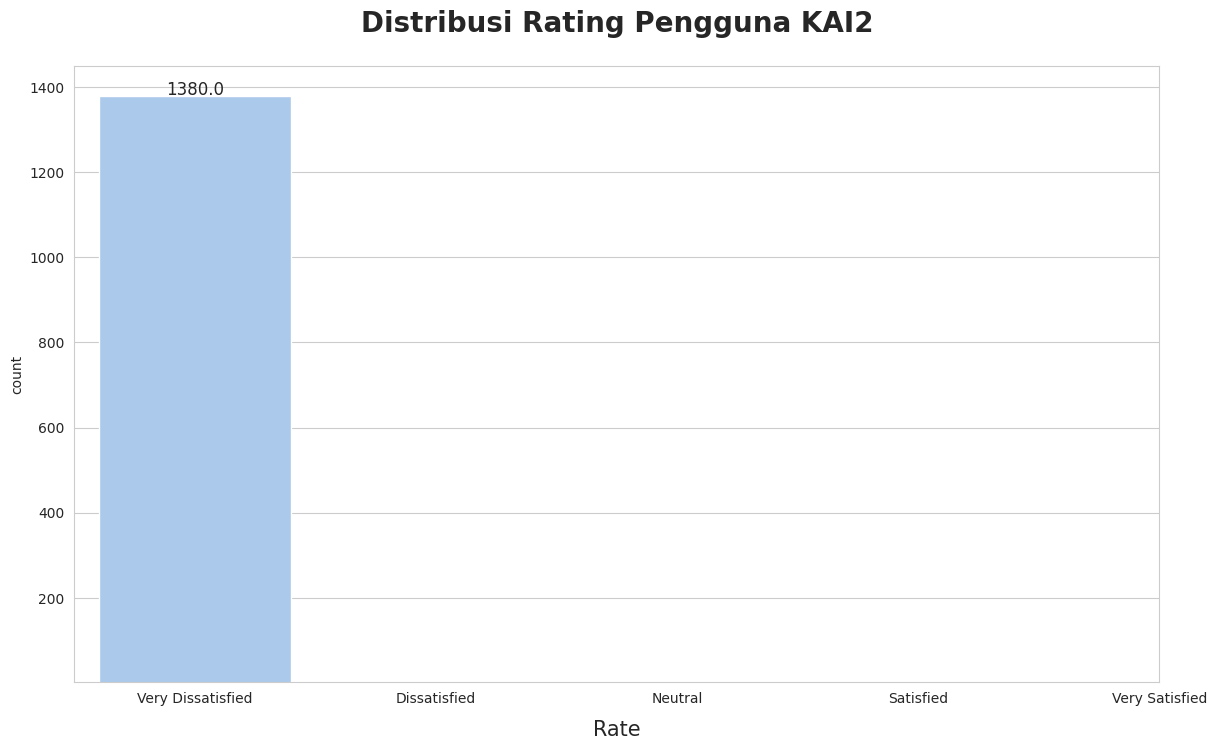

In [117]:
# visualisasi bar chart untuk melihat jumlah rating pengguna KAI2
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=KAI2, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna KAI2', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

In [118]:
grouped_data = KAI2.groupby(['score', 'year']).size().reset_index(name='count')

In [119]:
label_mapping = {
    "Very Dissatisfied": 0,
    "Dissatisfied": 1,
    "Neutral": 2,
    "Satisfied": 3,
    "Very Satisfied": 4
}

grouped_data['score'] = grouped_data['score'].map(label_mapping)

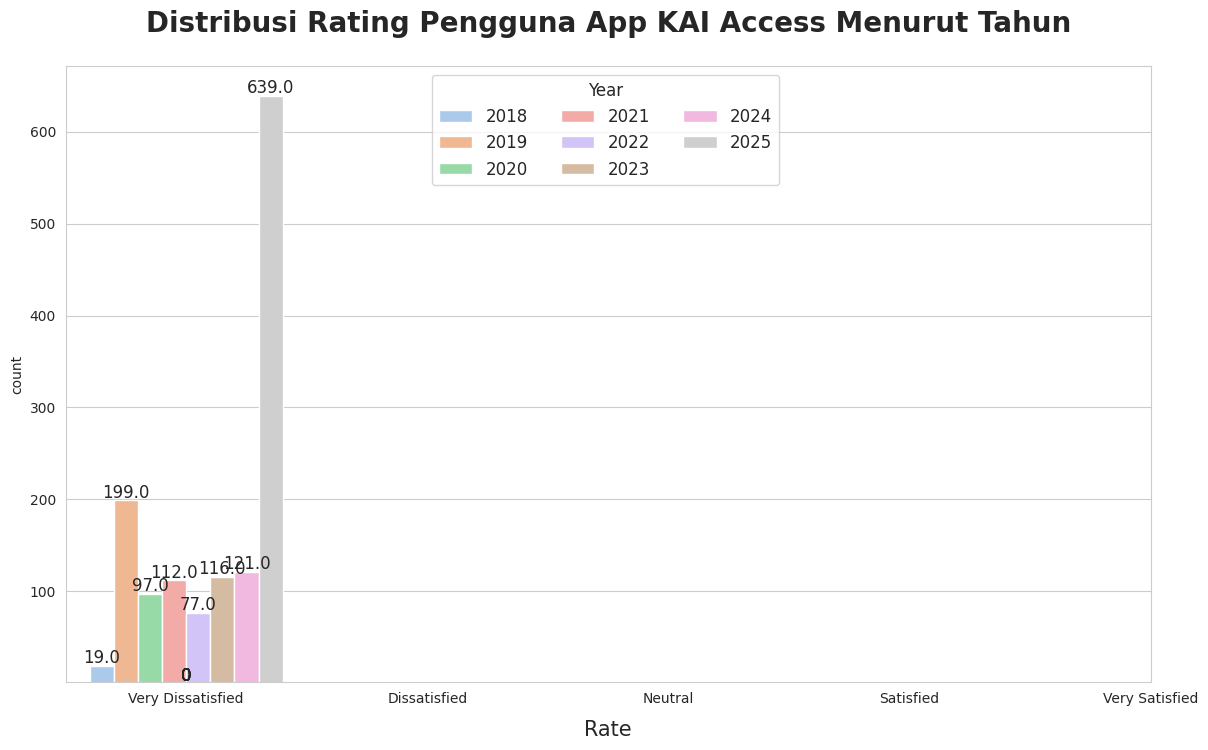

In [120]:
# mem-breakdown bar chart pada sel sebelumnya berdasarkan tahun
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=KAI2, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna App KAI Access Menurut Tahun', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## **2. Tokenizing**

**Cleaning Data**

menghapus noise dan menjadikan token

remove :
1. hapus special karakter
  -  mengubah karakter non-ASCII menjadi karakter yang dapat dibaca.
  - mengganti karakter escape (tab/newline/backslash) -> menjadi spasi
  - menghapus link url dan tag (re.sub)
2. hapus angka
  - menggunakan regex (\d+)
3. hapus punchtuation
  - menghapus semua tanda baca (str.maketrans) -> diganti string kosong
4. hapus whitespace/spasi/multiple
  - menghapus spasi atau whitespace yang diawal dan akhir teks menggunakan metode -> strip()
5. hapus satu karakter
  - menggunakan regez (\b[a-zA-Z]\b)
6. hapus small words (3 kata)
7. memecah teks menjadi token
  - lib NLTK
  [link text](https://)



In [121]:
!pip install Sastrawi


In [122]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
import nltk
nltk.download('punkt', force=True)
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [124]:
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('popular')  # Ini menghindari missing resource lainnya

# Download tokenizer NLTK
nltk.download('punkt')

# 1. Load data
df = pd.read_csv('/content/OlahData.csv')
OlahData = df[['content']].copy()
OlahData['case folding'] = OlahData['content'].str.lower()

# 2. Preprocessing fungsi

def remove_review_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

def remove_number(text):
    return re.sub(r"\d+", "", text)

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
from nltk.tokenize import word_tokenize

def remove_small_words(text):
    exceptions = ["kai", "tim"]  # Daftar kata pengecualian
    # Membuat pola regex yang mengecualikan kata-kata tertentu
    pattern = r'\b(?!' + '|'.join(exceptions) + r')\w{1,3}\b'
    text = re.sub(pattern, '', text)
    return text

def word_tokenize_wrapper(text):
    try:
        return word_tokenize(text)  # Tokenisasi menggunakan NLTK
    except LookupError as e:
        import nltk
        nltk.download('punkt')  # Jika resource tidak ada, unduh
        return word_tokenize(text)

# 3. Terapkan ke kolom "case folding"
OlahData['case folding'] = OlahData['case folding'].apply(remove_review_special)
OlahData['case folding'] = OlahData['case folding'].apply(remove_number)
OlahData['case folding'] = OlahData['case folding'].apply(remove_punctuation)
OlahData['case folding'] = OlahData['case folding'].apply(remove_whitespace_LT)
OlahData['case folding'] = OlahData['case folding'].apply(remove_whitespace_multiple)
OlahData['case folding'] = OlahData['case folding'].apply(remove_single_char)
OlahData['case folding'] = OlahData['case folding'].apply(remove_small_words)


from nltk.tokenize import word_tokenize

OlahData['tokenizing'] = OlahData['case folding'].apply(word_tokenize_wrapper)

# 5. Simpan hasil dan tampilkan
OlahData.to_csv('HasilPreprocessing.csv', index=False)

print('Tokenizing Result:\n')
print(OlahData[['tokenizing']].head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading 

Tokenizing Result:

                                          tokenizing
0  [saya, sebenarnya, kurang, setuju, pemberlakua...
1  [nice, cuman, kadang, sering, error, kalau, ap...
2  [habis, upgrade, malah, akun, tidak, bisa, aks...
3  [dengan, access, kai, semua, jadi, mudah, meme...
4  [pindah, kursi, menngganti, terlalu, lama, tid...


## **Normalization**

menganggti kata yang tidak baku menjadi baku dan
mengganti kata yang aneh

In [125]:
import pandas as pd

# Load data
OlahData = pd.read_csv('/content/HasilPreprocessing.csv', converters={'tokenizing': eval})

# Baca file manual untuk menghindari error multi-":"
normalizad_word_dict = {}

with open("/content/kata_tidak_baku.txt", "r", encoding="utf-8") as file:
    for line in file:
        # Pisahkan hanya di ':' pertama
        parts = line.strip().split(":", 1)
        if len(parts) == 2:
            tidak_baku = parts[0].strip()
            baku = parts[1].strip()
            normalizad_word_dict[tidak_baku] = baku

# Fungsi untuk menghapus kata yang berulang berturut-turut
def remove_consecutive_duplicates(document):
    result = []
    for i, word in enumerate(document):
        if i == 0 or word != document[i - 1]:  # Hanya tambahkan kata jika tidak sama dengan kata sebelumnya
            result.append(word)
    return result

def normalized_term(document):
    result = []
    for term in document:
        if term in normalizad_word_dict:
            result.extend(normalizad_word_dict[term].split())
        else:
            result.append(term)

    # Hapus kata yang berulang berturut-turut
    return remove_consecutive_duplicates(result)

# Proses normalisasi dan hapus kata berulang
OlahData['normalisasi'] = OlahData['tokenizing'].apply(normalized_term)

# Simpan hasil
OlahData.to_csv('/content/HasilPreprocessing.csv', index=False)

# Tampilkan hasil
print(OlahData[['normalisasi']].head())


                                         normalisasi
0  [saya, sebenarnya, kurang, setuju, pemberlakua...
1  [bagus, hanya, terkadang, sering, kesalahan, j...
2  [habis, pembaruan, namun, akun, tidak, bisa, a...
3  [dengan, access, kai, semua, sehingga, mudah, ...
4  [pindah, kursi, mengganti, terlalu, lama, tida...


## **Cleanning**
memengal menjadi kata dasar

In [126]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def main():
    try:
        # Initialize stemmer
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()

        # Load data
        csv_path = "/content/HasilPreprocessing.csv"
        OlahData = pd.read_csv(csv_path)

        # Perform stemming and tokenization
        OlahData['stemming teks'] = OlahData['normalisasi'].astype(str).apply(
            lambda x: [stemmer.stem(word) for word in x.split() if word.strip()]
        )

        # Save results
        OlahData.to_csv(csv_path, index=False)
        print("Results saved successfully")

        # Preview first 5 rows
        return display(OlahData[['normalisasi', 'stemming teks']].head())

    except FileNotFoundError:
        print(f"Error: File not found at {csv_path}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
    return pd.DataFrame()  # Return empty DataFrame on error

if __name__ == "__main__":
    result = main()
    print(result)

Results saved successfully


,normalisasi,stemming teks
0,"['saya', 'sebenarnya', 'kurang', 'setuju', 'pe...","[saya, benar, kurang, tuju, laku, wajib, guna,..."
1,"['bagus', 'hanya', 'terkadang', 'sering', 'kes...","[bagus, hanya, terkadang, sering, salah, jika,..."
2,"['habis', 'pembaruan', 'namun', 'akun', 'tidak...","[habis, baru, namun, akun, tidak, bisa, akses,..."
3,"['dengan', 'access', 'kai', 'semua', 'sehingga...","[dengan, access, kai, semua, sehingga, mudah, ..."
4,"['pindah', 'kursi', 'mengganti', 'terlalu', 'l...","[pindah, kursi, ganti, terlalu, lama, tidak, s..."


None


## **Filtering**

In [127]:
import pandas as pd
from nltk.corpus import stopwords

def stopword_removal_process():
    try:
        # 1. Load and prepare stopwords
        list_stopwords = stopwords.words('indonesian')

        # 2. Add custom stopwords
        custom_stopwords =custom_stopwords = [
    # Original stopwords
    "deh", "nih", "sih", "eh", "ah", "ya", "oh", "loh", "kok", "hmm", "emm",
    "ayo", "beuhh", "hehe", "hihi", "wkwkwk", "wkwkwkwkwk", "heehehe", "heheheh",
    "huhu", "hiks", "huuhhh", "hufffff", "yaaakk", "yaud", "aaa", "uuuu",

    # New additions from your input
    "euyyyyyy", "bobrooookkkk", "euyyyyy", "zonx", "hadehh", "woyy", "gbis",
    "membagongkan", "anjir", "tolol", "hadeeeehhhh", "siih", "hahahah", "Konoha",
    "ngab", "elaaaaaa", "mbokya", "yaaa", "wkwk", "poll", "lahh", "deehhhh",
    "wong", "dhoho", "remek", "jirr", "cok", "bobrok", "gblk", "anjirrr", "ehhh",
    "dahh", "zonk", "conk", "zong", "lohhh", "kocccaakkkk", "pliss", "baanngkeeeeee",
    "sihhh", "bisakha",

    # Original continued
    "yg", "dg", "dgn", "ny", "klo", "kalo", "ga", "gak", "krn", "tdk", "utk",
    "jd", "jgn", "sdh", "aja", "nyg", "sm", "mlu", "ken", "nan", "tau", "bikin",
    "bilang", "biar", "pen", "tuh", "si", "amp", "u",

    "bro", "mas", "well", "pls", "btw", "gg", "lol", "fyi",
    "idk", "cmiiw", "lmao", "otw",

    "dong", "dongg", "dunkz", "nya", "nyaa", "sich", "leee", "oiya",
    "in", "ki", "di", "ke", "bu", "an", "allah", "yah",
    "sdgkan", "sdg", "emg"
]
        list_stopwords.extend(custom_stopwords)

        # 3. Add stopwords from external file
        try:
            txt_stopword = pd.read_csv("/content/stopword-bahasa.txt", names=["stopwords"], header=None)
            list_stopwords.extend(txt_stopword["stopwords"].dropna().tolist())
        except FileNotFoundError:
            print("File stopword-bahasa.txt tidak ditemukan, menggunakan stopwords dasar saja")

        # Convert to set to remove duplicates
        list_stopwords = set(list_stopwords)

        # 4. Load data
        OlahData = pd.read_csv("/content/HasilPreprocessing.csv")

        # 5. Check for required columns
        if 'stemming teks' not in OlahData.columns:
            available_cols = OlahData.columns.tolist()
            print(f"Error: Kolom 'stemming teks' tidak ditemukan. Kolom yang tersedia: {available_cols}")

            if 'normalisasi' in available_cols:
                print("\nSaran: Anda perlu menjalankan proses stemming terlebih dahulu pada kolom 'normalisasi'")
            return None

        # 6. Define stopword removal function
        def remove_stopwords(word_list):
            if isinstance(word_list, str):
                # Handle string representation of list
                if word_list.startswith('[') and word_list.endswith(']'):
                    word_list = eval(word_list)
                else:
                    word_list = word_list.split()
            return [word for word in word_list if word not in list_stopwords]

        # 7. Apply stopword removal
        OlahData['filtering-teks'] = OlahData['stemming teks'].apply(remove_stopwords)

        # 8. Save results
        OlahData.to_csv("/content/HasilPreprocessing.csv", index=False)
        print("Stopword removal selesai. Hasil disimpan di /content/HasilPreprocessing.csv")

        # 9. Show preview
        print("\nPreview hasil:")
        display(OlahData[['stemming teks', 'filtering-teks']].head())
        return OlahData

    except FileNotFoundError:
        print("Error: File /content/HasilPreprocessing.csv tidak ditemukan")
        return None
    except Exception as e:
        print(f"Error tidak terduga: {str(e)}")
        return None

if __name__ == "__main__":
    result = stopword_removal_process()
    if result is not None:
        display(result)

File stopword-bahasa.txt tidak ditemukan, menggunakan stopwords dasar saja
Stopword removal selesai. Hasil disimpan di /content/HasilPreprocessing.csv

Preview hasil:


,stemming teks,filtering-teks
0,"['saya', 'benar', 'kurang', 'tuju', 'laku', 'w...","[tuju, laku, wajib, tiket, sesuai, lansia, mil..."
1,"['bagus', 'hanya', 'terkadang', 'sering', 'sal...","[bagus, terkadang, salah, aplikasi, tahap, ben..."
2,"['habis', 'baru', 'namun', 'akun', 'tidak', 'b...","[habis, akun, akses, tangan, histori, hilang, ..."
3,"['dengan', 'access', 'kai', 'semua', 'sehingga...","[access, kai, mudah, mes, tiket]"
4,"['pindah', 'kursi', 'ganti', 'terlalu', 'lama'...","[pindah, kursi, ganti, sistematis, aplikasi, m..."


,content,case folding,tokenizing,normalisasi,stemming teks,filtering-teks
0,Saya sebenarnya kurang setuju dgn pemberlakuan...,saya sebenarnya kurang setuju pemberlakuan wa...,"['saya', 'sebenarnya', 'kurang', 'setuju', 'pe...","['saya', 'sebenarnya', 'kurang', 'setuju', 'pe...","['saya', 'benar', 'kurang', 'tuju', 'laku', 'w...","[tuju, laku, wajib, tiket, sesuai, lansia, mil..."
1,"Nice App, Cuman Kadang Sering Error. Kalau Apl...",nice cuman kadang sering error kalau aplikasi...,"['nice', 'cuman', 'kadang', 'sering', 'error',...","['bagus', 'hanya', 'terkadang', 'sering', 'kes...","['bagus', 'hanya', 'terkadang', 'sering', 'sal...","[bagus, terkadang, salah, aplikasi, tahap, ben..."
2,Habis di upgrade malah akun tidak bisa di akse...,habis upgrade malah akun tidak bisa akses sa...,"['habis', 'upgrade', 'malah', 'akun', 'tidak',...","['habis', 'pembaruan', 'namun', 'akun', 'tidak...","['habis', 'baru', 'namun', 'akun', 'tidak', 'b...","[habis, akun, akses, tangan, histori, hilang, ..."
3,dengan access bu Kai semua jadi mudah memesan ...,dengan access kai semua jadi mudah memesan ti...,"['dengan', 'access', 'kai', 'semua', 'jadi', '...","['dengan', 'access', 'kai', 'semua', 'sehingga...","['dengan', 'access', 'kai', 'semua', 'sehingga...","[access, kai, mudah, mes, tiket]"
4,"utk pindah kursi, menngganti nya terlalu lama ...",pindah kursi menngganti terlalu lama tidak ...,"['pindah', 'kursi', 'menngganti', 'terlalu', '...","['pindah', 'kursi', 'mengganti', 'terlalu', 'l...","['pindah', 'kursi', 'ganti', 'terlalu', 'lama'...","[pindah, kursi, ganti, sistematis, aplikasi, m..."
...,...,...,...,...,...,...
776,ayoo perbanyak bintang satunya 👎,ayoo perbanyak bintang satunya,"['ayoo', 'perbanyak', 'bintang', 'satunya']","['ayoo', 'diperbanyak', 'bintang', 'satunya']","['ayoo', 'banyak', 'bintang', 'satu']","[ayoo, bintang]"
777,gimanaa sihhh jam 00.00 udah ngisi data penump...,gimanaa sihhh udah ngisi data penumpang eror...,"['gimanaa', 'sihhh', 'udah', 'ngisi', 'data', ...","['gimanaa', 'sihhh', 'sudah', 'mengisi', 'data...","['gimanaa', 'sihhh', 'sudah', 'isi', 'data', '...","[gimanaa, isi, data, tumpang, salah, truss, ny..."
778,masukan aja...tolong dibenahi sistem nya apala...,masukan ajatolong dibenahi sistem apalagi mo...,"['masukan', 'ajatolong', 'dibenahi', 'sistem',...","['masukan', 'ajatolong', 'dibenahi', 'sistem',...","['masuk', 'ajatolong', 'benah', 'sistem', 'leb...","[masuk, ajatolong, benah, sistem, momen, pesan..."
779,kebanyakan gangguan loding lamaa,kebanyakan gangguan loding lamaa,"['kebanyakan', 'gangguan', 'loding', 'lamaa']","['kebanyakan', 'gangguan', 'loading', 'lamaa']","['banyak', 'ganggu', 'loading', 'lamaa']","[ganggu, loading, lamaa]"


In [128]:
# Cara ini lebih aman dan eksplisit
result_copy = result.copy()
labeling_kai = result_copy.drop(columns=['content', 'case folding', 'tokenizing', 'normalisasi', 'stemming teks'])


In [129]:
print(OlahData.columns)  # atau OlahData.columns


Index(['content', 'case folding', 'tokenizing', 'normalisasi'], dtype='object')


In [130]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         781 non-null    object
 1   case folding    781 non-null    object
 2   tokenizing      781 non-null    object
 3   normalisasi     781 non-null    object
 4   stemming teks   781 non-null    object
 5   filtering-teks  781 non-null    object
dtypes: object(6)
memory usage: 36.7+ KB


In [131]:
# 3. Also show the new labeling_kai
print("\nNew labeling_kai DataFrame preview:")
display(labeling_kai.head())
# Menyimpan DataFrame labeling_kai ke file CSV
labeling_kai.to_csv('/content/labeling_kai.csv', index=False)




New labeling_kai DataFrame preview:


,filtering-teks
0,"[tuju, laku, wajib, tiket, sesuai, lansia, mil..."
1,"[bagus, terkadang, salah, aplikasi, tahap, ben..."
2,"[habis, akun, akses, tangan, histori, hilang, ..."
3,"[access, kai, mudah, mes, tiket]"
4,"[pindah, kursi, ganti, sistematis, aplikasi, m..."


## **Wordcloud Visualization**

In [132]:
review_all = []

for review in labeling_kai['filtering-teks']:
    for token_review in review:
        print(token_review)
        review_all.append(token_review)


Streaming output truncated to the last 5000 lines.
lokal
jarak
aplikasi
batas
orang
moga
mudah
cari
tiket
integrasi
mudah
tumpang
jarak
jarak
ubah
keretasaran
moga
diskon
pasu
kode
bayar
mobile
banking
livin
mandiri
kode
sesuai
kode
bayar
mohon
benah
biaya
mesan
gerai
indomaret
aplikasi
rekomendasi
biaya
ubah
kereta
indonesia
lacak
aplikasi
radar
manfaat
tumpang
lintas
palang
pintu
kendara
lintas
kereta
moga
ter
realisasi
tolong
akses
mesan
server
respons
backend
cepat
perhati
mobile
alat
spesifikasi
rendah
alhamdulillah
normal
pesan
tiket
cepat
alhamdulillah
harga
stasiun
semarang
kroya
turunin
ekonomi
ribu
oke
menginstall
ulang
aplikasi
langsung
masuk
aplikasi
akun
kai
laku
atur
ulang
sandi
masuk
aplikasi
mohon
aplikasi
bantu
terkadang
pesan
tiket
kai
aplikasi
kai
mudah
bayar
terima
kasih
kai
access
moga
fitur
lengkap
keluh
kereta
bengawan
malam
kutoarjo
bekas
tanggal
agustus
orang
kereta
cirebon
jalan
arah
bekas
cepat
kencang
suspensi
kereta
awat
guncang
asa
suara
hantam
suspensi
de

In [133]:
from nltk.probability import FreqDist
!pip install nltk
import nltk
nltk.download('punkt')  # Bisa dilewati kalau sudah pernah download


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire KAI review")
freq_dist

how many frequency distribution samples from an entire KAI review


FreqDist({'tiket': 502, 'aplikasi': 500, 'kai': 277, 'kereta': 243, 'mudah': 187, 'pesan': 162, 'bayar': 145, 'kasih': 144, 'beli': 137, 'bantu': 127, ...})

In [135]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('tiket', 502), ('aplikasi', 500), ('kai', 277), ('kereta', 243), ('mudah', 187), ('pesan', 162), ('bayar', 145), ('kasih', 144), ('beli', 137), ('bantu', 127), ('masuk', 121), ('terima', 119), ('bagus', 118), ('access', 114), ('tolong', 107), ('jadwal', 105), ('habis', 100), ('salah', 95), ('stasiun', 83), ('lokal', 82), ('kursi', 74), ('orang', 73), ('sulit', 72), ('mesan', 71), ('terkadang', 66), ('pilih', 66), ('mohon', 66), ('jalan', 61), ('muncul', 61), ('batal', 60), ('moga', 58), ('data', 57), ('tumpang', 56), ('layan', 55), ('daftar', 54), ('ubah', 54), ('nyaman', 51), ('langsung', 47), ('coba', 47), ('email', 46), ('buka', 45), ('sedia', 45), ('cepat', 44), ('ulang', 44), ('akun', 41), ('antre', 40), ('rumit', 39), ('duduk', 37), ('fitur', 36), ('time', 36), ('online', 34), ('mes', 33), ('lancar', 33), ('hasil', 33), ('laku', 32), ('cari', 32), ('loket', 31), ('berangkat', 31), ('temu', 31), ('bintang', 29), ('tulis', 29), ('akses', 28), ('tingkat', 28), ('saran', 28), ('sal

<Axes: title={'center': 'Top 20 Kata Terpopuler dari Review KAI'}, xlabel='Samples', ylabel='Counts'>

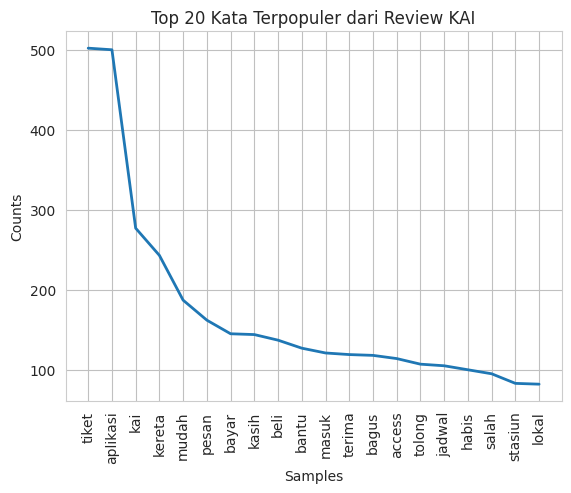

In [136]:
import matplotlib.pyplot as plt
freq_dist.plot(20, title="Top 20 Kata Terpopuler dari Review KAI")


In [137]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,tiket,502
1,aplikasi,500
2,kai,277
3,kereta,243
4,mudah,187
...,...,...
495,perihal,2
489,alternatif,2
485,wajib,2
498,distancing,2


In [138]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

In [139]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-140-7d32ba83a7e8>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




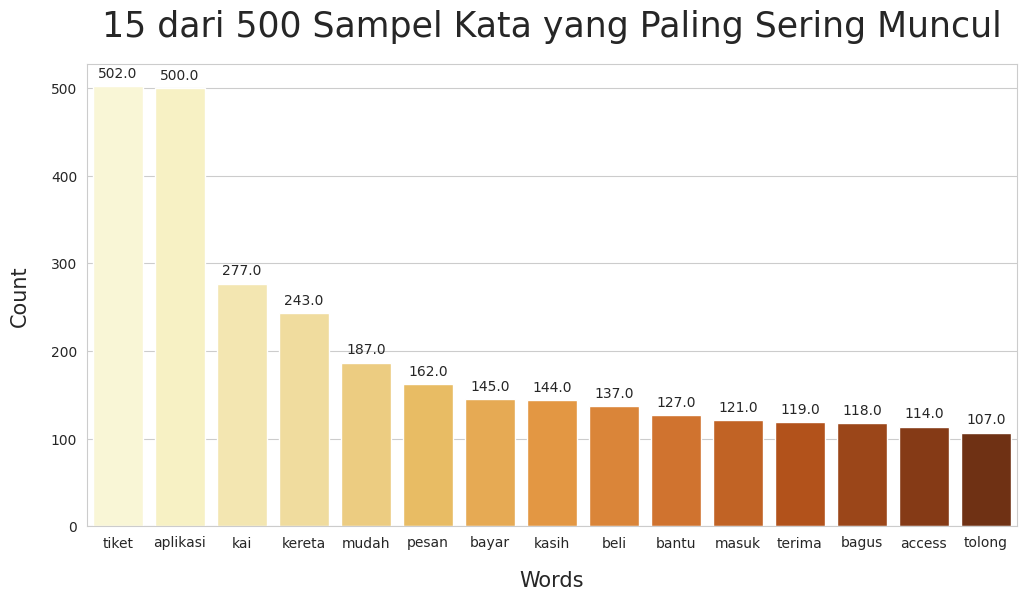

In [140]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
# Ambil 15 warna dari colormap 'rocket_r'
colors = sns.color_palette("YlOrBr", n_colors=15)
ax = sns.barplot(x='words', y='count', data=top15, palette=colors)
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

## **Labeling Using Inset Lexicon**

In [141]:
# Indonesia Sentiment lexicon (source: https://github.com/fajri91/InSet)
# Loads lexicon positive dan negative data
import csv

# Load lexicon positive
lexicon_positive = dict()
with open('/content/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)  # skip header
    for row in reader:
        if len(row) >= 2:
            lexicon_positive[row[0].strip()] = int(row[1])

# Load lexicon negative
lexicon_negative = dict()
with open('/content/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)  # skip header
    for row in reader:
        if len(row) >= 2:
            lexicon_negative[row[0].strip()] = int(row[1])


# Function to determine sentiment polarity
def analisis_sentimen_indonesia(text):
  # for word in text
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
    elif (word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity = ''
  if(score > 0):
    polarity = 'Positive'
  elif(score < 0):
    polarity = 'Negative'
  else:
    polarity = 'Neutral'
  return score, polarity
  # Contoh pengujian analisis sentimen pada string
string = "dengan aplikasi ini jadi lebih enak pesan tiket dari rumah"
hasil = analisis_sentimen_indonesia(string)
print(hasil)


(0, 'Neutral')


In [142]:
# Contoh pengujian analisis sentimen pada string
string = "dengan aplikasi ini jadi lebih enak pesan tiket dari rumah"
hasil = analisis_sentimen_indonesia(string)
print(hasil)


(0, 'Neutral')


In [143]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame
labeling_kai = pd.read_csv('/content/labeling_kai.csv')

# Jika 'filtering-teks' sudah berupa list, tidak perlu di split lagi, cukup salin ke kolom baru
labeling_kai['prepos_text'] = labeling_kai['filtering-teks']

# Menampilkan beberapa contoh dari kolom baru untuk memastikan hasilnya
print(labeling_kai[['filtering-teks', 'prepos_text']].head())


                                      filtering-teks  \
0  ['tuju', 'laku', 'wajib', 'tiket', 'sesuai', '...   
1  ['bagus', 'terkadang', 'salah', 'aplikasi', 't...   
2  ['habis', 'akun', 'akses', 'tangan', 'histori'...   
3         ['access', 'kai', 'mudah', 'mes', 'tiket']   
4  ['pindah', 'kursi', 'ganti', 'sistematis', 'ap...   

                                         prepos_text  
0  ['tuju', 'laku', 'wajib', 'tiket', 'sesuai', '...  
1  ['bagus', 'terkadang', 'salah', 'aplikasi', 't...  
2  ['habis', 'akun', 'akses', 'tangan', 'histori'...  
3         ['access', 'kai', 'mudah', 'mes', 'tiket']  
4  ['pindah', 'kursi', 'ganti', 'sistematis', 'ap...  


In [144]:
import pandas as pd
import csv
import ast

# Load dataset
df = pd.read_csv('/content/HasilPreprocessing.csv')  # Ganti dengan path file kamu

# Load lexicon positive
lexicon_positive = dict()
with open('/content/positive.csv', 'r') as csvfile:  # Ganti dengan path file kamu
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
        if len(row) >= 2:
            lexicon_positive[row[0].strip()] = int(row[1])

# Load lexicon negative
lexicon_negative = dict()
with open('/content/negative.csv', 'r') as csvfile:  # Ganti dengan path file kamu
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
        if len(row) >= 2:
            lexicon_negative[row[0].strip()] = int(row[1])

# Fungsi analisis sentimen
def analisis_sentimen_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]
    if score > 0:
        polarity = 'Positive'
    elif score < 0:
        polarity = 'Negative'
    else:
        polarity = 'Neutral'
    return score, polarity

# Parsing string ke list
df['filtering_list'] = df['filtering-teks'].apply(ast.literal_eval)

# Terapkan analisis
results = df['filtering_list'].apply(analisis_sentimen_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]

# Lihat hasil distribusi
print(df['polarity'].value_counts())

# Simpan ke file baru (opsional)
df.to_csv('/content/labeling_kai.csv', index=False)


polarity
Positive    449
Negative    280
Neutral      52
Name: count, dtype: int64


In [145]:
print(df['polarity'].value_counts())

polarity
Positive    449
Negative    280
Neutral      52
Name: count, dtype: int64


<ipython-input-146-8d42d1b770c5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




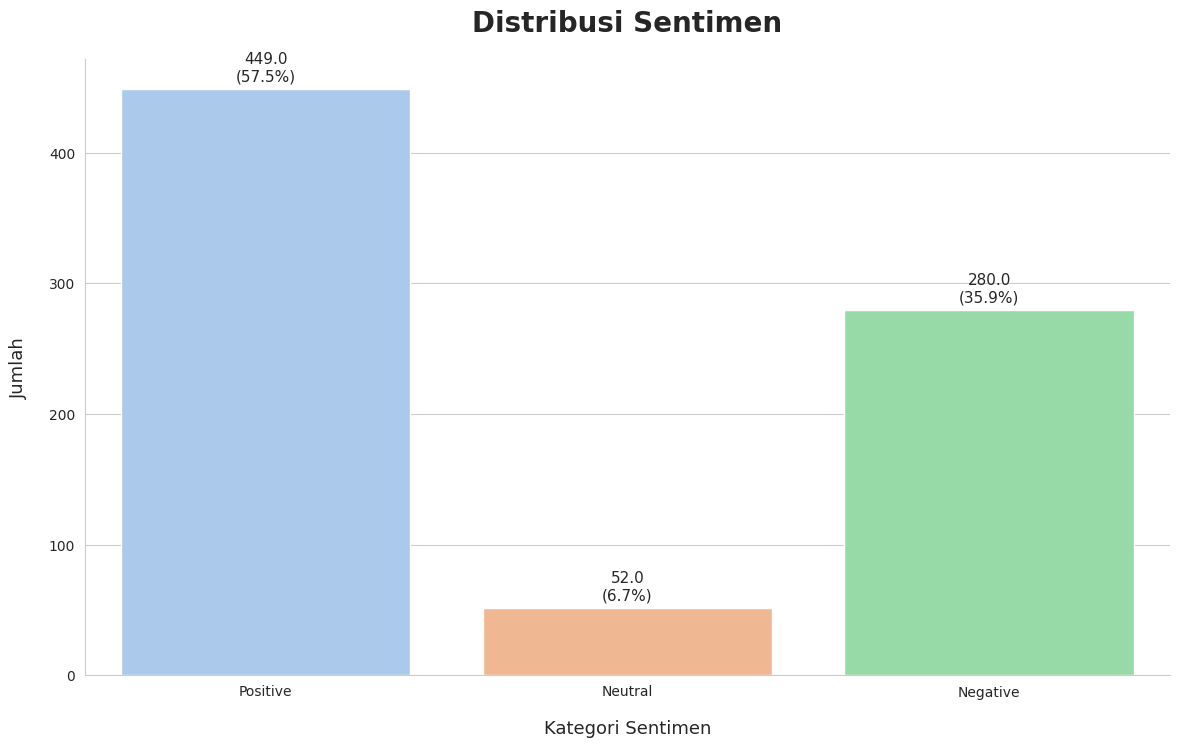

In [146]:
# Versi dengan persentase
total = len(df)
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='polarity', data=df, palette="pastel",
                  order=['Positive', 'Neutral', 'Negative'])

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,
            height + 3.25,
            f'{height}\n({height/total:.1%})',  # Menampilkan jumlah dan persentase
            ha='center',
            va='bottom',
            fontsize=11)

plt.title("Distribusi Sentimen", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Kategori Sentimen", fontsize=13, labelpad=15)
plt.ylabel("Jumlah", fontsize=13, labelpad=15)
sns.despine()
plt.show()

## **Hapus data netral**

tahap ini menghapus content yang bersentiment netral karena penelitiannya hanya menggunakan 2 sentiment yaitu positif dan negatif


In [147]:
df = df.drop(df[df['polarity'] == 'netral'].index)
df = df.reset_index(drop=True)

<ipython-input-148-903216eb08a0>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




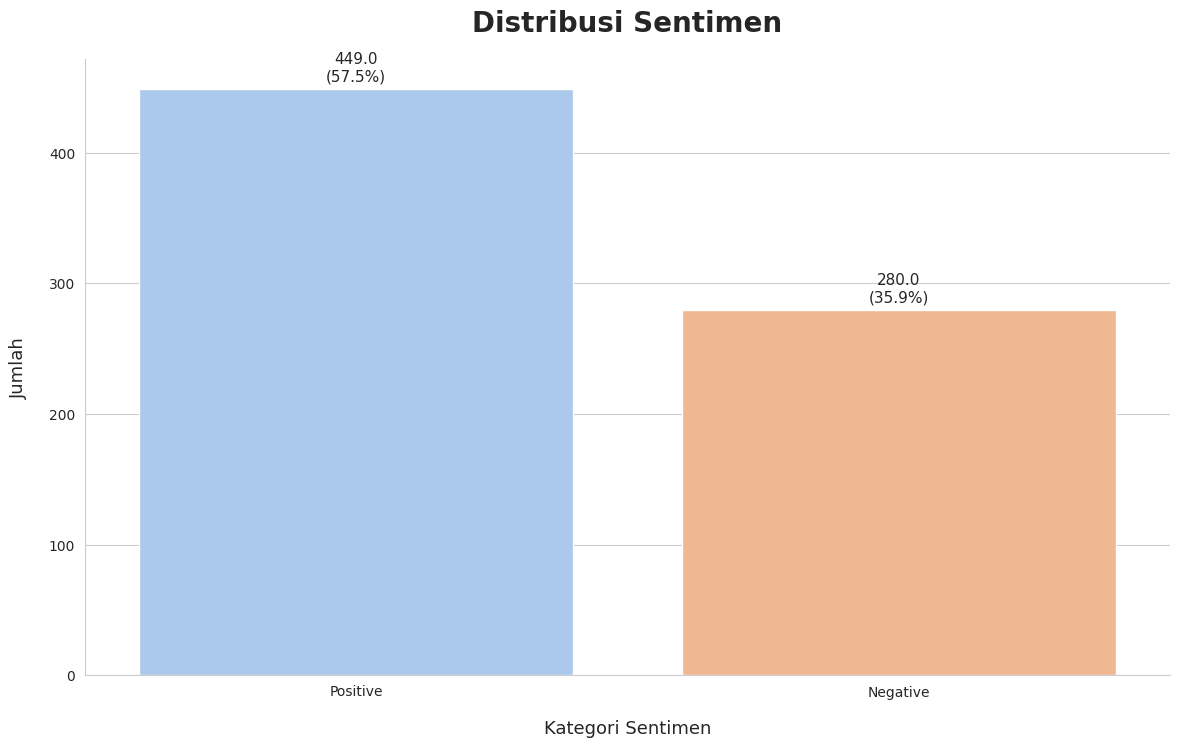

In [148]:
# Versi dengan persentase
total = len(df)
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='polarity', data=df, palette="pastel",
                  order=['Positive', 'Negative'])

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,
            height + 3.25,
            f'{height}\n({height/total:.1%})',  # Menampilkan jumlah dan persentase
            ha='center',
            va='bottom',
            fontsize=11)

plt.title("Distribusi Sentimen", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Kategori Sentimen", fontsize=13, labelpad=15)
plt.ylabel("Jumlah", fontsize=13, labelpad=15)
sns.despine()
plt.show()

In [149]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in df['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
df['polarity'] = polarity

In [150]:
df['polarity']

,polarity
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
776,-1
777,-1
778,-1
779,-1


In [151]:
df.polarity.value_counts()

,count
polarity,
-1,781


In [152]:
print("Value counts:\n", df['polarity'].value_counts())
print("Unique values:", df['polarity'].unique())

Value counts:
 polarity
-1    781
Name: count, dtype: int64
Unique values: [-1]


In [153]:
print("percentage of sentiment:")
value_counts = df['polarity'].value_counts()

# Define expected keys (modify based on your actual labels)
pos_key = 1    # or "positive"
neg_key = -1   # or "negative"

# Initialize percentages
train_pct_pos = value_counts.get(pos_key, 0) / value_counts.sum() * 100
train_pct_neg = value_counts.get(neg_key, 0) / value_counts.sum() * 100

print("percentage of positive sentiment:", round(train_pct_pos, 2), '%')
print("percentage of negative sentiment:", round(train_pct_neg, 2), '%')
print("difference:", round(train_pct_pos - train_pct_neg, 2), '%')

percentage of sentiment:
percentage of positive sentiment: 0.0 %
percentage of negative sentiment: 100.0 %
difference: -100.0 %


In [154]:
!pip install wordcloud


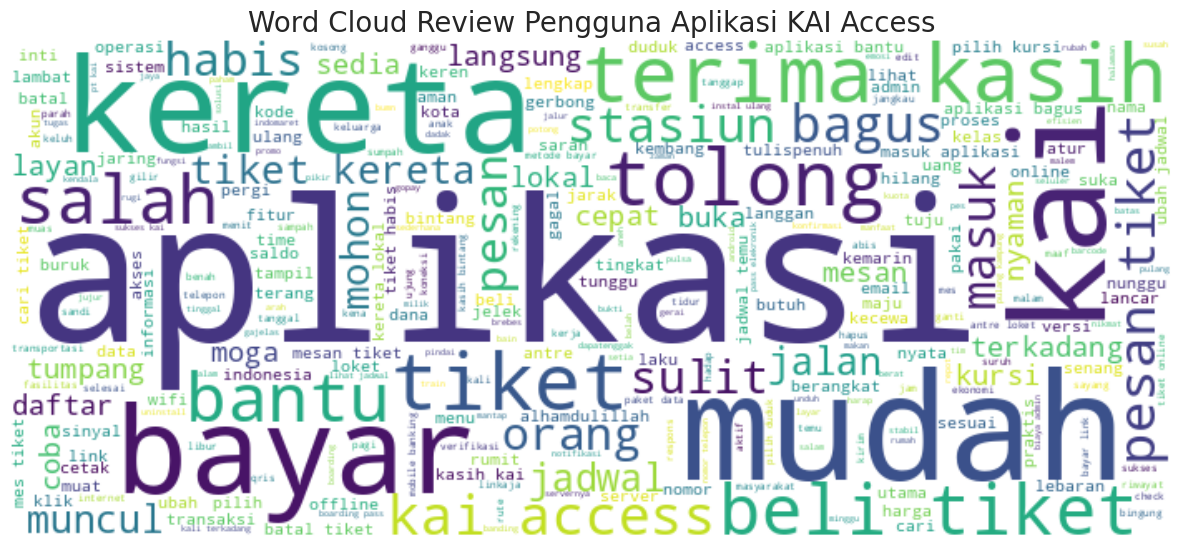

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua token menjadi satu string panjang
join_review = ' '.join(review_all)

# Buat objek WordCloud
w_pos = WordCloud(background_color="white",
                    width=700, height=300,
                    max_font_size=120,
                    max_words=500,
                    contour_color='blue',
                    colormap='viridis').generate(join_review)

# Tampilkan
plt.figure(figsize=(15, 7))
plt.imshow(w_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Review Pengguna Aplikasi KAI Access", fontsize=20)
plt.show()


In [156]:
X = df['filtering-teks']
y = df['polarity']

In [157]:
df.head()

,content,case folding,tokenizing,normalisasi,stemming teks,filtering-teks,filtering_list,polarity_score,polarity
0,Saya sebenarnya kurang setuju dgn pemberlakuan...,saya sebenarnya kurang setuju pemberlakuan wa...,"['saya', 'sebenarnya', 'kurang', 'setuju', 'pe...","['saya', 'sebenarnya', 'kurang', 'setuju', 'pe...","['saya', 'benar', 'kurang', 'tuju', 'laku', 'w...","['tuju', 'laku', 'wajib', 'tiket', 'sesuai', '...","[tuju, laku, wajib, tiket, sesuai, lansia, mil...",14,-1
1,"Nice App, Cuman Kadang Sering Error. Kalau Apl...",nice cuman kadang sering error kalau aplikasi...,"['nice', 'cuman', 'kadang', 'sering', 'error',...","['bagus', 'hanya', 'terkadang', 'sering', 'kes...","['bagus', 'hanya', 'terkadang', 'sering', 'sal...","['bagus', 'terkadang', 'salah', 'aplikasi', 't...","[bagus, terkadang, salah, aplikasi, tahap, ben...",20,-1
2,Habis di upgrade malah akun tidak bisa di akse...,habis upgrade malah akun tidak bisa akses sa...,"['habis', 'upgrade', 'malah', 'akun', 'tidak',...","['habis', 'pembaruan', 'namun', 'akun', 'tidak...","['habis', 'baru', 'namun', 'akun', 'tidak', 'b...","['habis', 'akun', 'akses', 'tangan', 'histori'...","[habis, akun, akses, tangan, histori, hilang, ...",0,-1
3,dengan access bu Kai semua jadi mudah memesan ...,dengan access kai semua jadi mudah memesan ti...,"['dengan', 'access', 'kai', 'semua', 'jadi', '...","['dengan', 'access', 'kai', 'semua', 'sehingga...","['dengan', 'access', 'kai', 'semua', 'sehingga...","['access', 'kai', 'mudah', 'mes', 'tiket']","[access, kai, mudah, mes, tiket]",4,-1
4,"utk pindah kursi, menngganti nya terlalu lama ...",pindah kursi menngganti terlalu lama tidak ...,"['pindah', 'kursi', 'menngganti', 'terlalu', '...","['pindah', 'kursi', 'mengganti', 'terlalu', 'l...","['pindah', 'kursi', 'ganti', 'terlalu', 'lama'...","['pindah', 'kursi', 'ganti', 'sistematis', 'ap...","[pindah, kursi, ganti, sistematis, aplikasi, m...",-2,-1


In [158]:
from sklearn.model_selection import train_test_split

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
import numpy as np

# --- 1. Load Dataset ---
df = pd.read_csv("/content/labeling_kai.csv")  # Ganti dengan nama file CSV asli kamu

# --- 2. Siapkan Fitur dan Label ---
# Ambil kolom 'filtering_list' sebagai teks (gabungkan jadi string)
X = df['filtering_list'].astype(str)

# Label dari kolom 'polarity'
y = df['polarity']

print("Original class distribution:")
print(y.value_counts())

# --- 3. Setup tempat menyimpan hasil evaluasi ---
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

# --- 4. Loop percobaan ---
for test in np.arange(0.1, 0.4, 0.1):
    for random in np.arange(0, 30, 5):
        print("\ntest size:", test)
        print("random state:", random)

        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                test_size=test,
                random_state=random,
                stratify=y
            )
        except ValueError as e:
            print(f"Skipping - Error in stratify: {e}")
            continue

        # Cek apakah minimal ada 2 kelas
        if len(np.unique(y_train)) < 2:
            print("Skipped - only one class in training set")
            continue

        # TF-IDF Vectorizer
        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
        X_train_vect = vectorizer.fit_transform(X_train)
        X_test_vect = vectorizer.transform(X_test)

        # Train model
        model = SVC(kernel='linear')
        model.fit(X_train_vect, y_train)

        train_acc = model.score(X_train_vect, y_train)
        predict = model.predict(X_test_vect)

        # Evaluate
        accuracy = accuracy_score(y_test, predict)
        confusion = confusion_matrix(y_test, predict)
        class_report = classification_report(y_test, predict)
        recall = recall_score(y_test, predict, average='weighted', zero_division=0)
        precision = precision_score(y_test, predict, average='weighted', zero_division=0)

        print(f"Train Accuracy: {train_acc:.2f}")
        print(f"Test Accuracy: {accuracy:.2f}")
        print('Confusion Matrix:\n', confusion)
        print('Classification Report:\n', class_report)

        # Save results
        test_num.append(test)
        random_num.append(random)
        acc_num.append(accuracy)
        re_num.append(recall)
        pre_num.append(precision)
        matrix.append(confusion)
        report.append(class_report)

    print("="*80)


Original class distribution:
polarity
Positive    449
Negative    280
Neutral      52
Name: count, dtype: int64

test size: 0.1
random state: 0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.94
Test Accuracy: 0.77
Confusion Matrix:
 [[20  0  8]
 [ 2  0  3]
 [ 5  0 41]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.71      0.73        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.79      0.89      0.84        46

    accuracy                           0.77        79
   macro avg       0.51      0.54      0.52        79
weighted avg       0.72      0.77      0.74        79


test size: 0.1
random state: 5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.93
Test Accuracy: 0.82
Confusion Matrix:
 [[22  0  6]
 [ 2  0  3]
 [ 3  0 43]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.79      0.80        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.83      0.93      0.88        46

    accuracy                           0.82        79
   macro avg       0.55      0.57      0.56        79
weighted avg       0.77      0.82      0.79        79


test size: 0.1
random state: 10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.93
Test Accuracy: 0.84
Confusion Matrix:
 [[22  0  6]
 [ 1  0  4]
 [ 2  0 44]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.79      0.83        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.81      0.96      0.88        46

    accuracy                           0.84        79
   macro avg       0.56      0.58      0.57        79
weighted avg       0.79      0.84      0.81        79


test size: 0.1
random state: 15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.94
Test Accuracy: 0.81
Confusion Matrix:
 [[23  0  5]
 [ 1  0  4]
 [ 5  0 41]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.82      0.81        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.82      0.89      0.85        46

    accuracy                           0.81        79
   macro avg       0.54      0.57      0.55        79
weighted avg       0.76      0.81      0.78        79


test size: 0.1
random state: 20


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.94
Test Accuracy: 0.81
Confusion Matrix:
 [[24  0  4]
 [ 1  0  4]
 [ 6  0 40]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.86      0.81        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.83      0.87      0.85        46

    accuracy                           0.81        79
   macro avg       0.54      0.58      0.55        79
weighted avg       0.76      0.81      0.78        79


test size: 0.1
random state: 25


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.94
Test Accuracy: 0.85
Confusion Matrix:
 [[24  0  4]
 [ 0  0  5]
 [ 3  0 43]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.86      0.87        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.83      0.93      0.88        46

    accuracy                           0.85        79
   macro avg       0.57      0.60      0.58        79
weighted avg       0.80      0.85      0.82        79


test size: 0.2
random state: 0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.94
Test Accuracy: 0.79
Confusion Matrix:
 [[42  0 14]
 [ 3  0  8]
 [ 8  0 82]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.75      0.77        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.79      0.91      0.85        90

    accuracy                           0.79       157
   macro avg       0.53      0.55      0.54       157
weighted avg       0.73      0.79      0.76       157


test size: 0.2
random state: 5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.93
Test Accuracy: 0.82
Confusion Matrix:
 [[43  0 13]
 [ 2  0  9]
 [ 5  0 85]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.77      0.81        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.79      0.94      0.86        90

    accuracy                           0.82       157
   macro avg       0.55      0.57      0.56       157
weighted avg       0.76      0.82      0.78       157


test size: 0.2
random state: 10
Train Accuracy: 0.93
Test Accuracy: 0.78
Confusion Matrix:
 [[40  0 16]
 [ 2  0  9]
 [ 7  0 83]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.71      0.76        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.77      0.92      0.84        90

    accuracy                           0.78       157
   macro avg       0.53      0.55      0.53       157
weighted avg      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.94
Test Accuracy: 0.81
Confusion Matrix:
 [[46  0 10]
 [ 2  0  9]
 [ 8  1 81]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.82      0.82        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.81      0.90      0.85        90

    accuracy                           0.81       157
   macro avg       0.54      0.57      0.56       157
weighted avg       0.76      0.81      0.78       157


test size: 0.2
random state: 20


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Train Accuracy: 0.94
Test Accuracy: 0.80
Confusion Matrix:
 [[47  0  9]
 [ 4  0  7]
 [11  0 79]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.84      0.80        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.83      0.88      0.85        90

    accuracy                           0.80       157
   macro avg       0.53      0.57      0.55       157
weighted avg       0.75      0.80      0.77       157


test size: 0.2
random state: 25
Train Accuracy: 0.94
Test Accuracy: 0.78
Confusion Matrix:
 [[44  0 12]
 [ 5  0  6]
 [12  0 78]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.79      0.75        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.81      0.87      0.84        90

    accuracy                           0.78       157
   macro avg       0.51      0.55      0.53       157
weighted avg      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Train Accuracy: 0.95
Test Accuracy: 0.78
Confusion Matrix:
 [[ 66   0  18]
 [  4   0  12]
 [ 17   0 118]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.77        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.80      0.87      0.83       135

    accuracy                           0.78       235
   macro avg       0.52      0.55      0.54       235
weighted avg       0.73      0.78      0.75       235


test size: 0.30000000000000004
random state: 5
Train Accuracy: 0.94
Test Accuracy: 0.80
Confusion Matrix:
 [[ 61   0  23]
 [  1   0  15]
 [  7   0 128]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.73      0.80        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.77      0.95      0.85       135

    accuracy                           0.80       235
   macro avg       0.55      0.56      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.93
Test Accuracy: 0.79
Confusion Matrix:
 [[ 62   0  22]
 [  5   0  11]
 [ 12   0 123]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.74      0.76        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.79      0.91      0.85       135

    accuracy                           0.79       235
   macro avg       0.52      0.55      0.54       235
weighted avg       0.73      0.79      0.76       235


test size: 0.30000000000000004
random state: 15
Train Accuracy: 0.95
Test Accuracy: 0.81
Confusion Matrix:
 [[ 66   0  18]
 [  3   0  13]
 [ 10   1 124]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.79      0.81        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.80      0.92      0.86       135

    accuracy                           0.81       235
   macro avg       0.55      0.57     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Train Accuracy: 0.94
Test Accuracy: 0.80
Confusion Matrix:
 [[ 67   0  17]
 [  5   0  11]
 [ 13   0 122]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.80      0.79        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.81      0.90      0.86       135

    accuracy                           0.80       235
   macro avg       0.53      0.57      0.55       235
weighted avg       0.75      0.80      0.78       235


test size: 0.4
random state: 0
Train Accuracy: 0.95
Test Accuracy: 0.78
Confusion Matrix:
 [[ 83   0  29]
 [  5   0  16]
 [ 19   0 161]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.78      0.89      0.83       180

    accuracy                           0.78       313
   macro avg       0.52      0.55      0.53       313
w

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.93
Test Accuracy: 0.78
Confusion Matrix:
 [[ 77   0  35]
 [  1   0  20]
 [ 12   0 168]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.69      0.76       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.75      0.93      0.83       180

    accuracy                           0.78       313
   macro avg       0.54      0.54      0.53       313
weighted avg       0.74      0.78      0.75       313


test size: 0.4
random state: 10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.93
Test Accuracy: 0.80
Confusion Matrix:
 [[ 82   0  30]
 [  6   0  15]
 [ 11   0 169]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.73      0.78       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.79      0.94      0.86       180

    accuracy                           0.80       313
   macro avg       0.54      0.56      0.55       313
weighted avg       0.75      0.80      0.77       313


test size: 0.4
random state: 15
Train Accuracy: 0.95
Test Accuracy: 0.80
Confusion Matrix:
 [[ 86   0  26]
 [  7   0  14]
 [ 16   1 163]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.77      0.78       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.80      0.91      0.85       180

    accuracy                           0.80       313
   macro avg       0.53      0.56      0.54       313


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.95
Test Accuracy: 0.76
Confusion Matrix:
 [[ 81   0  31]
 [  5   0  16]
 [ 23   0 157]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.72      0.73       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.77      0.87      0.82       180

    accuracy                           0.76       313
   macro avg       0.50      0.53      0.52       313
weighted avg       0.71      0.76      0.73       313


test size: 0.4
random state: 25
Train Accuracy: 0.95
Test Accuracy: 0.79
Confusion Matrix:
 [[ 87   0  25]
 [  4   0  17]
 [ 20   1 159]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.78      0.78       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.79      0.88      0.83       180

    accuracy                           0.79       313
   macro avg       0.52      0.55      0.54       313


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
import numpy as np

test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
    for random in np.arange(0, 30, 5):
        print("test size:", test)
        print("random state:", random)

        # Stratify to preserve class balance
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test, random_state=random, stratify=y
        )

        # Skip jika y_train hanya memiliki 1 kelas
        if len(set(y_train)) < 2:
            print("Skipped - only one class in training set\n")
            continue

        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
        X_train_vect = vectorizer.fit_transform(X_train)
        X_test_vect = vectorizer.transform(X_test)

        SVM = SVC(kernel='linear')
        SVM.fit(X_train_vect, y_train)

        train_score = SVM.score(X_train_vect, y_train)
        print("Train Accuracy:", train_score)

        predict = SVM.predict(X_test_vect)

        accuracy = accuracy_score(y_test, predict)
        recall = recall_score(y_test, predict, average='weighted')
        precision = precision_score(y_test, predict, average='weighted')
        confusion = confusion_matrix(y_test, predict)
        classification = classification_report(y_test, predict)

        print("Confusion Matrix:\n", confusion)
        print("Classification Report:\n", classification)
        print("Accuracy Score:", round(accuracy, 2))
        print("Recall Score:", round(recall, 2))
        print("Precision Score:", round(precision, 2))
        print("\n")

        # Simpan hasil
        test_num.append(test)
        random_num.append(random)
        acc_num.append(accuracy)
        re_num.append(recall)
        pre_num.append(precision)
        matrix.append(confusion)
        report.append(classification)

    print("=================================================================")


test size: 0.1
random state: 0
Train Accuracy: 0.9430199430199431
Confusion Matrix:
 [[20  0  8]
 [ 2  0  3]
 [ 5  0 41]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.71      0.73        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.79      0.89      0.84        46

    accuracy                           0.77        79
   macro avg       0.51      0.54      0.52        79
weighted avg       0.72      0.77      0.74        79

Accuracy Score: 0.77
Recall Score: 0.77
Precision Score: 0.72


test size: 0.1
random state: 5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9301994301994302
Confusion Matrix:
 [[22  0  6]
 [ 2  0  3]
 [ 3  0 43]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.79      0.80        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.83      0.93      0.88        46

    accuracy                           0.82        79
   macro avg       0.55      0.57      0.56        79
weighted avg       0.77      0.82      0.79        79

Accuracy Score: 0.82
Recall Score: 0.82
Precision Score: 0.77


test size: 0.1
random state: 10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9316239316239316
Confusion Matrix:
 [[22  0  6]
 [ 1  0  4]
 [ 2  0 44]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.79      0.83        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.81      0.96      0.88        46

    accuracy                           0.84        79
   macro avg       0.56      0.58      0.57        79
weighted avg       0.79      0.84      0.81        79

Accuracy Score: 0.84
Recall Score: 0.84
Precision Score: 0.79


test size: 0.1
random state: 15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9430199430199431
Confusion Matrix:
 [[23  0  5]
 [ 1  0  4]
 [ 5  0 41]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.82      0.81        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.82      0.89      0.85        46

    accuracy                           0.81        79
   macro avg       0.54      0.57      0.55        79
weighted avg       0.76      0.81      0.78        79

Accuracy Score: 0.81
Recall Score: 0.81
Precision Score: 0.76


test size: 0.1
random state: 20


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9444444444444444
Confusion Matrix:
 [[24  0  4]
 [ 1  0  4]
 [ 6  0 40]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.86      0.81        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.83      0.87      0.85        46

    accuracy                           0.81        79
   macro avg       0.54      0.58      0.55        79
weighted avg       0.76      0.81      0.78        79

Accuracy Score: 0.81
Recall Score: 0.81
Precision Score: 0.76


test size: 0.1
random state: 25


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9401709401709402
Confusion Matrix:
 [[24  0  4]
 [ 0  0  5]
 [ 3  0 43]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.86      0.87        28
     Neutral       0.00      0.00      0.00         5
    Positive       0.83      0.93      0.88        46

    accuracy                           0.85        79
   macro avg       0.57      0.60      0.58        79
weighted avg       0.80      0.85      0.82        79

Accuracy Score: 0.85
Recall Score: 0.85
Precision Score: 0.8


test size: 0.2
random state: 0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9391025641025641
Confusion Matrix:
 [[42  0 14]
 [ 3  0  8]
 [ 8  0 82]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.75      0.77        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.79      0.91      0.85        90

    accuracy                           0.79       157
   macro avg       0.53      0.55      0.54       157
weighted avg       0.73      0.79      0.76       157

Accuracy Score: 0.79
Recall Score: 0.79
Precision Score: 0.73


test size: 0.2
random state: 5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9310897435897436
Confusion Matrix:
 [[43  0 13]
 [ 2  0  9]
 [ 5  0 85]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.77      0.81        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.79      0.94      0.86        90

    accuracy                           0.82       157
   macro avg       0.55      0.57      0.56       157
weighted avg       0.76      0.82      0.78       157

Accuracy Score: 0.82
Recall Score: 0.82
Precision Score: 0.76


test size: 0.2
random state: 10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9262820512820513
Confusion Matrix:
 [[40  0 16]
 [ 2  0  9]
 [ 7  0 83]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.71      0.76        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.77      0.92      0.84        90

    accuracy                           0.78       157
   macro avg       0.53      0.55      0.53       157
weighted avg       0.73      0.78      0.75       157

Accuracy Score: 0.78
Recall Score: 0.78
Precision Score: 0.73


test size: 0.2
random state: 15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9423076923076923
Confusion Matrix:
 [[46  0 10]
 [ 2  0  9]
 [ 8  1 81]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.82      0.82        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.81      0.90      0.85        90

    accuracy                           0.81       157
   macro avg       0.54      0.57      0.56       157
weighted avg       0.76      0.81      0.78       157

Accuracy Score: 0.81
Recall Score: 0.81
Precision Score: 0.76


test size: 0.2
random state: 20
Train Accuracy: 0.9439102564102564
Confusion Matrix:
 [[47  0  9]
 [ 4  0  7]
 [11  0 79]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.84      0.80        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.83      0.88      0.85        90

    accuracy                           0.80       157
   macro avg       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9391025641025641
Confusion Matrix:
 [[44  0 12]
 [ 5  0  6]
 [12  0 78]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.79      0.75        56
     Neutral       0.00      0.00      0.00        11
    Positive       0.81      0.87      0.84        90

    accuracy                           0.78       157
   macro avg       0.51      0.55      0.53       157
weighted avg       0.72      0.78      0.75       157

Accuracy Score: 0.78
Recall Score: 0.78
Precision Score: 0.72


test size: 0.30000000000000004
random state: 0
Train Accuracy: 0.9505494505494505


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Confusion Matrix:
 [[ 66   0  18]
 [  4   0  12]
 [ 17   0 118]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.77        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.80      0.87      0.83       135

    accuracy                           0.78       235
   macro avg       0.52      0.55      0.54       235
weighted avg       0.73      0.78      0.75       235

Accuracy Score: 0.78
Recall Score: 0.78
Precision Score: 0.73


test size: 0.30000000000000004
random state: 5
Train Accuracy: 0.9377289377289377
Confusion Matrix:
 [[ 61   0  23]
 [  1   0  15]
 [  7   0 128]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.73      0.80        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.77      0.95      0.85       135

    accuracy                           0.80       235
   macro avg       0.55

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Confusion Matrix:
 [[ 62   0  22]
 [  5   0  11]
 [ 12   0 123]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.74      0.76        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.79      0.91      0.85       135

    accuracy                           0.79       235
   macro avg       0.52      0.55      0.54       235
weighted avg       0.73      0.79      0.76       235

Accuracy Score: 0.79
Recall Score: 0.79
Precision Score: 0.73


test size: 0.30000000000000004
random state: 15
Train Accuracy: 0.945054945054945
Confusion Matrix:
 [[ 66   0  18]
 [  3   0  13]
 [ 10   1 124]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.79      0.81        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.80      0.92      0.86       135

    accuracy                           0.81       235
   macro avg       0.55

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Confusion Matrix:
 [[ 66   0  18]
 [  6   0  10]
 [ 15   0 120]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.77        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.81      0.89      0.85       135

    accuracy                           0.79       235
   macro avg       0.52      0.56      0.54       235
weighted avg       0.74      0.79      0.76       235

Accuracy Score: 0.79
Recall Score: 0.79
Precision Score: 0.74


test size: 0.30000000000000004
random state: 25
Train Accuracy: 0.9358974358974359
Confusion Matrix:
 [[ 67   0  17]
 [  5   0  11]
 [ 13   0 122]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.80      0.79        84
     Neutral       0.00      0.00      0.00        16
    Positive       0.81      0.90      0.86       135

    accuracy                           0.80       235
   macro avg       0.5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9508547008547008
Confusion Matrix:
 [[ 83   0  29]
 [  5   0  16]
 [ 19   0 161]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.78      0.89      0.83       180

    accuracy                           0.78       313
   macro avg       0.52      0.55      0.53       313
weighted avg       0.73      0.78      0.75       313

Accuracy Score: 0.78
Recall Score: 0.78
Precision Score: 0.73


test size: 0.4
random state: 5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9316239316239316
Confusion Matrix:
 [[ 77   0  35]
 [  1   0  20]
 [ 12   0 168]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.69      0.76       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.75      0.93      0.83       180

    accuracy                           0.78       313
   macro avg       0.54      0.54      0.53       313
weighted avg       0.74      0.78      0.75       313

Accuracy Score: 0.78
Recall Score: 0.78
Precision Score: 0.74


test size: 0.4
random state: 10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9316239316239316
Confusion Matrix:
 [[ 82   0  30]
 [  6   0  15]
 [ 11   0 169]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.73      0.78       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.79      0.94      0.86       180

    accuracy                           0.80       313
   macro avg       0.54      0.56      0.55       313
weighted avg       0.75      0.80      0.77       313

Accuracy Score: 0.8
Recall Score: 0.8
Precision Score: 0.75


test size: 0.4
random state: 15


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9465811965811965
Confusion Matrix:
 [[ 86   0  26]
 [  7   0  14]
 [ 16   1 163]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.77      0.78       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.80      0.91      0.85       180

    accuracy                           0.80       313
   macro avg       0.53      0.56      0.54       313
weighted avg       0.74      0.80      0.77       313

Accuracy Score: 0.8
Recall Score: 0.8
Precision Score: 0.74


test size: 0.4
random state: 20
Train Accuracy: 0.9529914529914529
Confusion Matrix:
 [[ 81   0  31]
 [  5   0  16]
 [ 23   0 157]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.72      0.73       112
     Neutral       0.00      0.00      0.00        21
    Positive       0.77      0.87      0.82       180

    accuracy                           0.76       313
   ma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [161]:
print("Unique classes in y:", np.unique(y))
print("Class distribution:\n", y.value_counts())

Unique classes in y: ['Negative' 'Neutral' 'Positive']
Class distribution:
 polarity
Positive    449
Negative    280
Neutral      52
Name: count, dtype: int64


In [162]:
# Check if we have multiple classes before fitting
if len(np.unique(y_train)) > 1:
    SVM.fit(X_train_vect, y_train)
    # Rest of your code...
else:
    print(f"Skipping - only one class (value: {y_train.iloc[0]}) in training set")

In [163]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[20, 0, 8], [2, 0, 3], [5, 0, 41]]",0.772152,0.772152,0.721645
1,0.1,5,"[[22, 0, 6], [2, 0, 3], [3, 0, 43]]",0.822785,0.822785,0.770295
2,0.1,10,"[[22, 0, 6], [1, 0, 4], [2, 0, 44]]",0.835443,0.835443,0.786348
3,0.1,15,"[[23, 0, 5], [1, 0, 4], [5, 0, 41]]",0.810127,0.810127,0.758568
4,0.1,20,"[[24, 0, 4], [1, 0, 4], [6, 0, 40]]",0.810127,0.810127,0.759630
5,0.1,25,"[[24, 0, 4], [0, 0, 5], [3, 0, 43]]",0.848101,0.848101,0.796549
6,0.2,0,"[[42, 0, 14], [3, 0, 8], [8, 0, 82]]",0.789809,0.789809,0.734643
7,0.2,5,"[[43, 0, 13], [2, 0, 9], [5, 0, 85]]",0.815287,0.815287,0.762136
8,0.2,10,"[[40, 0, 16], [2, 0, 9], [7, 0, 83]]",0.783439,0.783439,0.731726
9,0.2,15,"[[46, 0, 10], [2, 0, 9], [8, 1, 81]]",0.808917,0.808917,0.757325


In [164]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[20, 0, 8], [2, 0, 3], [5, 0, 41]]",0.77,0.77,0.72
1,0.1,5,"[[22, 0, 6], [2, 0, 3], [3, 0, 43]]",0.82,0.82,0.77
2,0.1,10,"[[22, 0, 6], [1, 0, 4], [2, 0, 44]]",0.84,0.84,0.79
3,0.1,15,"[[23, 0, 5], [1, 0, 4], [5, 0, 41]]",0.81,0.81,0.76
4,0.1,20,"[[24, 0, 4], [1, 0, 4], [6, 0, 40]]",0.81,0.81,0.76
5,0.1,25,"[[24, 0, 4], [0, 0, 5], [3, 0, 43]]",0.85,0.85,0.80
6,0.2,0,"[[42, 0, 14], [3, 0, 8], [8, 0, 82]]",0.79,0.79,0.73
7,0.2,5,"[[43, 0, 13], [2, 0, 9], [5, 0, 85]]",0.82,0.82,0.76
8,0.2,10,"[[40, 0, 16], [2, 0, 9], [7, 0, 83]]",0.78,0.78,0.73
9,0.2,15,"[[46, 0, 10], [2, 0, 9], [8, 1, 81]]",0.81,0.81,0.76


In [165]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()


In [166]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

In [167]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=20)

In [169]:
X_train.shape

(702,)

In [170]:
X_test.shape

(79,)

In [171]:
X_train

,filtering_list
106,"['moga', 'kembang', 'kereta']"
760,"['bagus', 'jelek', 'pesan', 'tiket', 'tulis', ..."
189,"['temu', 'kolom', 'kritik', 'saran', 'aplikasi..."
269,"['masuk', 'aplikasi', 'kalah', 'cepat', 'bandi..."
730,[]
...,...
218,"['aplikasi', 'bagus', 'coba', 'pesan', 'lokal'..."
223,"['pesan', 'tiket', 'kai', 'access', 'henti', '..."
271,"['cepat', 'beli', 'tiket', 'kereta', 'antre', ..."
474,"['laku', 'bayar', 'link', 'coba', 'masuk', 'at..."


In [172]:
print(X_train)

106                        ['moga', 'kembang', 'kereta']
760    ['bagus', 'jelek', 'pesan', 'tiket', 'tulis', ...
189    ['temu', 'kolom', 'kritik', 'saran', 'aplikasi...
269    ['masuk', 'aplikasi', 'kalah', 'cepat', 'bandi...
730                                                   []
                             ...                        
218    ['aplikasi', 'bagus', 'coba', 'pesan', 'lokal'...
223    ['pesan', 'tiket', 'kai', 'access', 'henti', '...
271    ['cepat', 'beli', 'tiket', 'kereta', 'antre', ...
474    ['laku', 'bayar', 'link', 'coba', 'masuk', 'at...
355    ['pasu', 'kode', 'bayar', 'mobile', 'banking',...
Name: filtering_list, Length: 702, dtype: object


## **TF - IDF (VECTOR REPRESENTASI)**

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [174]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [175]:
y_train.shape

(702,)

In [176]:
X_train_vect

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7773 stored elements and shape (702, 1498)>

In [177]:
print(X_train_vect)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7773 stored elements and shape (702, 1498)>
  Coords	Values
  (0, 871)	0.5774432305520498
  (0, 621)	0.7186488349942497
  (0, 632)	0.3874315003339557
  (1, 105)	0.12252104016182719
  (1, 555)	0.19245233462025693
  (1, 1046)	0.11382095329679853
  (1, 1382)	0.07553342930388751
  (1, 1432)	0.1805804884492757
  (1, 533)	0.13355917628801184
  (1, 1359)	0.17277099274573632
  (1, 441)	0.2314276619286188
  (1, 890)	0.31696225384573756
  (1, 457)	0.13301258228882418
  (1, 145)	0.12252104016182719
  (1, 1110)	0.2314276619286188
  (1, 1400)	0.26076641250732285
  (1, 1247)	0.4628553238572376
  (1, 1441)	0.15556693457230616
  (1, 1332)	0.20588162010066832
  (1, 75)	0.0731746591146228
  (1, 339)	0.3117300101258911
  (1, 1463)	0.2453129436909802
  (1, 120)	0.3117300101258911
  (2, 632)	0.3135184571605648
  (2, 1359)	0.2640991405552817
  :	:
  (700, 4)	0.0774846939893882
  (700, 708)	0.10604544736876963
  (700, 1051)	0.3755332092610913
  (7

In [178]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)

## **Data Modeling**

In [179]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [180]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [181]:
predict = svm.predict(X_test_vect)

In [182]:
predict

array(['Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negati

In [183]:
predict_df = pd.DataFrame(predict, columns=['predict'])
predict_df['y_actual'] = y_test.ravel()

<ipython-input-183-5b11a91746f2>:2: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



In [184]:
predict_df

,predict,y_actual
0,Negative,Negative
1,Positive,Negative
2,Positive,Negative
3,Positive,Positive
4,Positive,Positive
...,...,...
74,Negative,Negative
75,Positive,Positive
76,Positive,Positive
77,Positive,Negative


In [185]:
print(svm.coef_) # values of weight

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2834 stored elements and shape (3, 1498)>
  Coords	Values
  (0, 419)	-0.9068392953047413
  (0, 618)	-0.4427807355808732
  (0, 790)	-0.7207153596377052
  (0, 88)	-0.47037398417059173
  (0, 372)	-0.47037398417059173
  (0, 445)	-0.47037398417059173
  (0, 598)	-0.4019647711632083
  (0, 98)	-0.8652996142827281
  (0, 74)	-0.7071067811865475
  (0, 1141)	-0.7071067811865475
  (0, 447)	-0.5000598573430808
  (0, 1310)	-0.36240372707702406
  (0, 569)	-0.5679316060596552
  (0, 474)	-0.34304120048145476
  (0, 503)	-0.2699529848390557
  (0, 1197)	-0.4390999382353567
  (0, 229)	-0.49364546005082816
  (0, 265)	-0.49364546005082816
  (0, 493)	-0.4160722143640864
  (0, 1254)	-0.33971483420976856
  (0, 1334)	-0.4160722143640864
  (0, 41)	-0.32754301628774946
  (0, 857)	-0.40116454850536265
  (0, 868)	-0.32754301628774946
  (0, 269)	-0.4064451543091113
  :	:
  (2, 250)	0.06519384274762341
  (2, 252)	0.07406783179374898
  (2, 369)	-0.01255196489

In [186]:
print(svm.intercept_) # values of b

[ 0.53337283 -0.21434822 -0.70018963]


In [187]:
print(svm.classes_) # class of sentiment

['Negative' 'Neutral' 'Positive']


In [188]:
print(svm.dual_coef_)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1094 stored elements and shape (2, 547)>
  Coords	Values
  (0, 0)	0.2320767967222483
  (0, 1)	0.21386457222013233
  (0, 2)	0.3598805219536266
  (0, 3)	0.4070235725702313
  (0, 4)	0.0
  (0, 5)	0.0
  (0, 6)	0.0
  (0, 7)	0.0
  (0, 8)	0.4333176881393305
  (0, 9)	0.1540070739278693
  (0, 10)	0.0
  (0, 11)	0.6134549259041379
  (0, 12)	0.1127189568235435
  (0, 13)	0.030149937310095822
  (0, 14)	0.0
  (0, 15)	0.5731849317273461
  (0, 16)	0.3958804031378283
  (0, 17)	0.09054867265738703
  (0, 18)	0.36033388855494664
  (0, 19)	0.07904190507342433
  (0, 20)	0.33616292349818294
  (0, 21)	0.1587191496926141
  (0, 22)	0.3623594889819179
  (0, 23)	0.0552471895093357
  (0, 24)	0.22603226664882928
  :	:
  (1, 522)	-0.0
  (1, 523)	-0.5965877683912509
  (1, 524)	-0.24064776198199025
  (1, 525)	-0.0
  (1, 526)	-0.34855585102888254
  (1, 527)	-0.45269488031348454
  (1, 528)	-0.0
  (1, 529)	-0.0
  (1, 530)	-0.23192689888095314
  (1, 531)	-0.00495

In [189]:
svm.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9344729344729344

In [190]:
svm.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.7088607594936709

In [191]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Encode label jadi angka
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
predict_encoded = le.transform(predict)

# Hitung Mean Squared Error
mse = mean_squared_error(y_test_encoded, predict_encoded)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.8987341772151899


## **Final Visualization that represented the result of Predicted**

In [192]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

31
31


<ipython-input-192-b1d5758e29ad>:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-192-b1d5758e29ad>:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [193]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,Negative,31
1,Positive,48


In [194]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 39.24 %
percentage of negative sentiment: 39.24 %
difference between percentage positive and negative: 0.0 %


<ipython-input-194-8838fdaecaea>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-194-8838fdaecaea>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



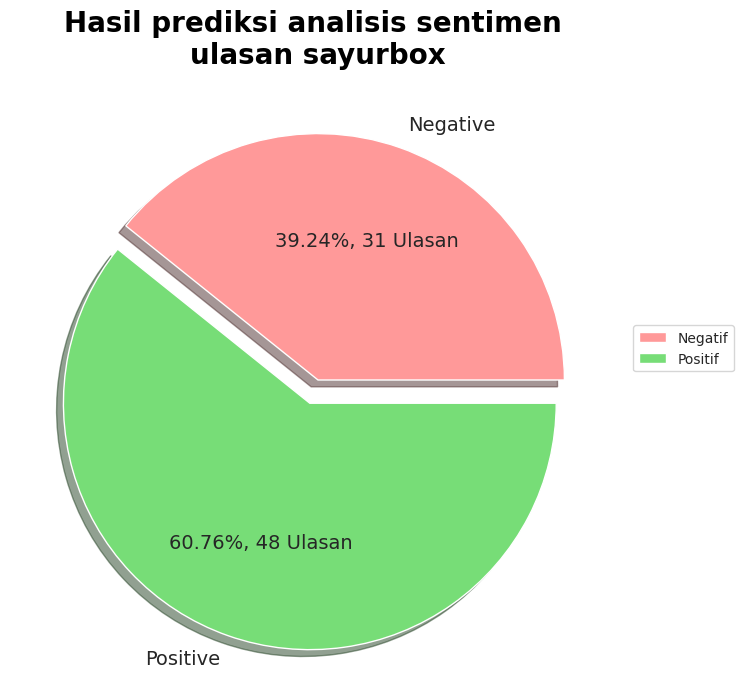

In [195]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan sayurbox', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])



plt.show()

## **EVALUASI**

In [196]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[21,  0,  8],
       [ 2,  0,  5],
       [ 8,  0, 35]])

In [201]:
# ax = plt.subplots()
# ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
#             annot_kws={"fontsize":13})

# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# plt.show()

In [203]:
# target_names = ['Negative','Positive']
# print(classification_report(y_test, predict, target_names=target_names))

In [202]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score

# akurasi = accuracy_score(y_test, predict)
# print("Accuracy model:", round(akurasi,2))

# recall = recall_score(y_test, predict)
# print("Recall model:", round(recall,2))

# precision = precision_score(y_test, predict)
# print("Precision model:", round(precision,2))

## **Menghubungkan ke Program Menggunakan Flask**

In [204]:
!pip install flask-ngrok
!pip isntall pyngrok==4.1.1
!ngrok authtoken

ERROR: unknown command "isntall" - maybe you meant "install"
/bin/bash: line 1: ngrok: command not found


In [209]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # ini buat ngejalanin Flask di ngrok

@app.route('/')
def home():
    return render_template('content/index.html')
  # hilangkan "/" di awal path

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           